In [ ]:
# Importing Libraries that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Defining Bicycle Class + attributes + methods

In [3]:
class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

In [4]:
#Defining Step method to implement Kinematic Formulas

In [5]:
class Bicycle(Bicycle):
    def step(self, v, w):        
        if w < -1.22:
            w = -1.22
        elif w > 1.22:
            w = 1.22
            
        self.xc = self.xc + v*np.cos(self.theta + self.beta)*self.sample_time
        self.yc = self.yc + v*np.sin(self.theta + self.beta)*self.sample_time
        self.theta = self.theta + (v*np.cos(self.beta)*np.tan(self.delta)/self.L)*self.sample_time
        self.delta = self.delta + w*self.sample_time
        self.beta = self.beta + np.arctan(self.lr*np.tan(self.delta)/self.L)*self.sample_time
        pass

In [6]:
#Lets print circle path with our bicycle

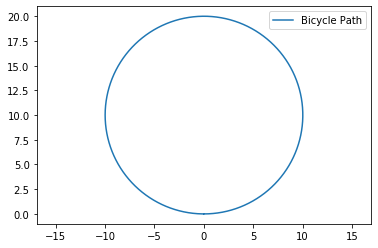

In [7]:
sample_time = 0.01
time_end = 20
model = Bicycle()


# Method1. Setting delta directly

model.delta = np.arctan(2/10)

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(np.pi, 0)
    model.beta = 0

    
plt.axis('equal')
plt.plot(x_data, y_data,label='Bicycle Path')
plt.legend()
plt.show()

In [8]:
#Lets make the same move but this time we use Method2, this time we don't set the delta value directly.

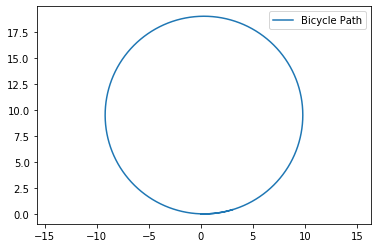

In [9]:
sample_time = 0.01
time_end = 20
model.reset()


t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    if model.delta < np.arctan(2/10):
        model.step(np.pi, model.w_max)
    else:
        model.step(np.pi, 0)
    model.beta = 0 
      

plt.axis('equal')
plt.plot(x_data, y_data,label='Bicycle Path')
plt.legend()
plt.show()

In [10]:
#Now, lets try the Square Path

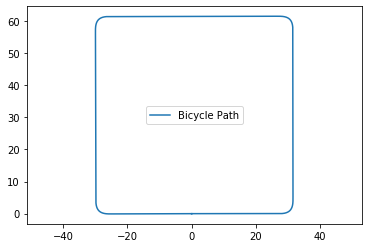

In [14]:
sample_time = 0.01
time_end = 60
model.reset()


t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 

w_data = np.zeros_like(t_data)

# ==================================
#  Square Path: set w at corners only
## ==================================
w_data[670:670+100] = 0.715
w_data[670+100:670+100*2] = -0.715
w_data[2170:2170+100] = 0.715
w_data[2170+100:2170+100*2] = -0.715
w_data[3670:3670+100] = 0.715
w_data[3670+100:3670+100*2] = -0.715
w_data[5170:5170+100] = 0.715
w_data[5170+100:5170+100*2] = -0.715

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])
    model.beta = 0

    
plt.axis('equal')
plt.plot(x_data, y_data,label='Bicycle Path')
plt.legend()
plt.show()

In [12]:
#Lets try Spiral Path

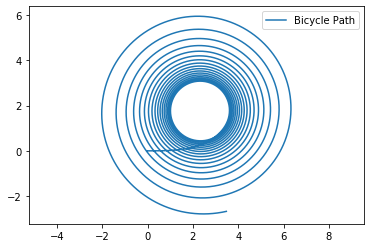

In [13]:
sample_time = 0.01
time_end = 60
model.reset()


t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 

w_data = np.zeros_like(t_data)

# ========================================================
#  Spiral Path: high positive w, then small negative w
# ========================================================
w_data[:] = -1/100
w_data[0:100] = 1

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])
    model.beta = 0

    
plt.axis('equal')
plt.plot(x_data, y_data,label='Bicycle Path')
plt.legend()
plt.show()

In [ ]:
#Lets try Wave Path

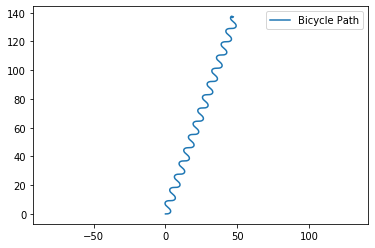

In [15]:
sample_time = 0.01
time_end = 60
model.reset()


t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 

w_data = np.zeros_like(t_data)

# ==================================
#  Wave Path: square wave w input
# ==================================
w_data[:] = 0
w_data[0:100] = 1
w_data[100:300] = -1
w_data[300:500] = 1
w_data[500:5700] = np.tile(w_data[100:500], 13)
w_data[5700:] = -1

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])
    model.beta = 0

    
plt.axis('equal')
plt.plot(x_data, y_data,label='Bicycle Path')
plt.legend()
plt.show()

In [16]:
#FINAL PART: 8 SHAPE WITH BICYCLE MODEL

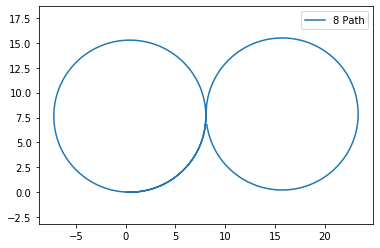

In [17]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
v_data[:] = (17.11/15)*np.pi
w_data = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    if i in range(int(t_data.shape[0]*5/9)):
        x_data[i] = model.xc
        y_data[i] = model.yc
        if model.delta < np.arctan(2/8):
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
        model.beta = 0
    elif i in range(int(t_data.shape[0]*5/9),(t_data.shape[0])):
        x_data[i] = model.xc
        y_data[i] = model.yc
        if model.delta > (-1)* np.arctan(2/8):
            model.step(v_data[i], (-1)*model.w_max)
            w_data[i] = (-1)*model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
        model.beta = 0

plt.axis('equal')
plt.plot(x_data, y_data,label='8 Path')
plt.legend()
plt.show()
